In [1]:
import pandas as pd
from numpy import nan
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Shreyas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('float_format', '{:f}'.format)

In [ ]:
df = pd.read_csv('loan.csv', low_memory=False)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.isnull().sum()

In [ ]:
df = df.loc[:, df.isin([' ','NULL', nan]).mean() < 0.4]

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.drop('emp_title', axis = 1, inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop('title', axis=1, inplace=True)

In [ ]:
df.loan_status.value_counts()

In [ ]:
# df = df[df.loan_status != 'Current']
# df = df[df.loan_status != 'In Grace Period']
# df = df[df.loan_status != 'Late (16-30 days)']
# df = df[df.loan_status != 'Late (31-120 days)']
# df = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
# df = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']
# df = df[df.loan_status != 'Issued']

In [ ]:
# df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'})
# df['loan_status'].value_counts()

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [ ]:
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)

In [ ]:
missing_value_df

In [ ]:
df = df.loc[:, df.isin([' ','NULL', nan]).mean() < 0.35]

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
df.dtypes

In [ ]:
df=df[df.loan_status != 'Current']
df = df[df.loan_status != 'In Grace Period']
df = df[df.loan_status != 'Late (16-30 days)']
df = df[df.loan_status != 'Late (31-120 days)']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
df = df[df.loan_status != 'Does not meet the credit policy. Status:Charged Off']
df = df[df.loan_status != 'Issued']

In [ ]:
df['loan_status'].value_counts()

In [ ]:
# df_LC = df[df.loan_status != 'Current']
# df_LC = df_LC[df_LC.loan_status != 'In Grace Period']
# df_LC = df_LC[df_LC.loan_status != 'Late (16-30 days)']
# df_LC = df_LC[df_LC.loan_status != 'Late (31-120 days)']
# df_LC = df_LC[df_LC.loan_status != 'Does not meet the credit policy. Status:Fully Paid']
# df_LC = df_LC[df_LC.loan_status != 'Does not meet the credit policy. Status:Charged Off']
# df_LC = df_LC[df_LC.loan_status != 'Issued']

In [ ]:
df.head()

In [ ]:
df['loan_status'] = df['loan_status'].replace({'Charged Off':'Default'})
df['loan_status'].value_counts()

In [ ]:
df['loan_status'].value_counts()

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(x='loan_status',data=df)

In [ ]:
df.drop('emp_length', axis=1, inplace=True)

In [ ]:
df = df[df['zip_code'].notnull()]

In [ ]:
df.issue_d.value_counts()

In [ ]:
mean_dti = df['dti'].mean()

In [ ]:
mean_dti

In [ ]:
df['dti'] = df['dti'].fillna(mean_dti)

In [ ]:
df.inq_last_6mths.value_counts()

In [ ]:
df = df[df['inq_last_6mths'].notnull()]

In [ ]:
df = df[df['revol_util'].notnull()]

In [ ]:
df = df[df['tot_coll_amt'].notnull()]

In [ ]:
df = df[df['mths_since_recent_inq'].notnull()]

In [ ]:
df = df[df['last_pymnt_d'].notnull()]

In [ ]:
df.drop('last_credit_pull_d', axis=1, inplace=True)

In [ ]:
df.drop(['bc_open_to_buy','bc_util','mo_sin_old_il_acct','mths_since_recent_bc','num_tl_120dpd_2m','percent_bc_gt_75'], axis=1, inplace=True)

In [ ]:
df = df[df['num_rev_accts'].notnull()]

In [ ]:
df = df[df['pct_tl_nvr_dlq'].notnull()]

In [ ]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df.drop('grade', axis=1, inplace=True) # sub_grade is enough so dropping grade as both denotes same meaning

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
df['sub_grade'] = le.fit_transform(df['sub_grade'])

In [ ]:
df.dtypes

In [ ]:
df.debt_settlement_flag.value_counts()

In [ ]:
df=df[df.home_ownership != 'ANY']
df=df[df.home_ownership != 'OTHER']
df=df[df.home_ownership != 'NONE']

In [ ]:
df['home_ownership'] = le.fit_transform(df['home_ownership'])

In [ ]:
df['verification_status'] = le.fit_transform(df['verification_status'])

In [ ]:
df['IssueYear'] = pd.to_datetime(df['issue_d']).dt.year
df['IssueMonth'] = pd.to_datetime(df['issue_d']).dt.strftime('%b')

In [ ]:
pd.to_datetime(df['issue_d']).dt.strftime('%b')

In [ ]:
df.to_csv('13/04loanFinal.csv', index=False)

In [ ]:
df.to_csv('loanDataProcessed.csv', index=False)

In [ ]:
df['IssueYear'] = le.fit_transform(df['IssueYear'])

In [ ]:
df['IssueMonth'] = le.fit_transform(df['IssueMonth'])

In [ ]:
df.drop('issue_d', axis=1, inplace=True)

In [ ]:
df['loan_status'] = le.fit_transform(df['loan_status'])

In [ ]:
df.drop('pymnt_plan', axis=1, inplace=True)

In [ ]:
df['purpose'] = le.fit_transform(df['purpose'])

In [ ]:
df['zip_code'] = le.fit_transform(df['zip_code'])

In [ ]:
df.drop('addr_state', axis=1, inplace=True)

In [ ]:
df['earCrLineYear'] = pd.to_datetime(df['earliest_cr_line']).dt.year
df['earCrLineMonth'] = pd.to_datetime(df['earliest_cr_line']).dt.strftime('%b')
df['earCrLineYear'] = le.fit_transform(df['earCrLineYear'])
df['earCrLineMonth'] = le.fit_transform(df['earCrLineMonth'])

In [ ]:
df.drop('earliest_cr_line', axis=1, inplace=True)

In [ ]:
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])

In [ ]:
df['lastPymtYear'] = pd.to_datetime(df['last_pymnt_d']).dt.year
df['lastPymtMonth'] = pd.to_datetime(df['last_pymnt_d']).dt.strftime('%b')
df['lastPymtYear'] = le.fit_transform(df['lastPymtYear'])
df['lastPymtMonth'] = le.fit_transform(df['lastPymtMonth'])

In [ ]:
df.drop('last_pymnt_d', axis=1, inplace=True)

In [ ]:
df['application_type'] = le.fit_transform(df['application_type'])

In [ ]:
df.drop('hardship_flag', axis=1, inplace=True)

In [ ]:
df.drop('debt_settlement_flag', axis=1, inplace=True)
df.drop('disbursement_method', axis=1, inplace=True)

In [ ]:
df.to_csv('dataP2P.csv', index=False)

# MODELLING

In [3]:
df = pd.read_csv('dataP2P.csv', low_memory=False)

In [4]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,IssueYear,IssueMonth,earCrLineYear,earCrLineMonth,lastPymtYear,lastPymtMonth
0,30000,30000,30000.000000,36,22.350000,1151.160000,19,0,100000.000000,1,1,2,856,30.460000,0.000000,0.000000,11.000000,1.000000,15603,37.000000,19.000000,1,0.000000,0.000000,30026.442500,30026.440000,30000.000000,26.440000,0.000000,0.000000,0.000000,30082.320000,0.000000,1,1,0.000000,0.000000,472330.000000,42200.000000,4.000000,42939.000000,0.000000,0.000000,73.000000,23.000000,2.000000,1.000000,8.000000,0.000000,3.000000,4.000000,3.000000,5.000000,10.000000,6.000000,8.000000,4.000000,11.000000,0.000000,0.000000,2.000000,89.500000,1.000000,0.000000,527120.000000,98453.000000,28600.000000,101984.000000,6,2,68,4,7,4
1,40000,40000,40000.000000,60,16.140000,975.710000,13,0,45000.000000,2,1,1,439,50.530000,0.000000,0.000000,18.000000,0.000000,34971,64.500000,37.000000,1,0.000000,0.000000,40856.678960,40856.680000,40000.000000,856.680000,0.000000,0.000000,0.000000,40910.480000,0.000000,1,1,0.000000,0.000000,271068.000000,54200.000000,5.000000,15059.000000,0.000000,0.000000,70.000000,2.000000,2.000000,1.000000,9.000000,0.000000,7.000000,9.000000,7.000000,7.000000,26.000000,9.000000,10.000000,9.000000,18.000000,0.000000,0.000000,4.000000,100.000000,0.000000,0.000000,344802.000000,161720.000000,45700.000000,167965.000000,6,2,65,6,7,3
2,20000,20000,20000.000000,36,7.560000,622.680000,2,0,100000.000000,0,1,1,921,18.920000,0.000000,0.000000,9.000000,0.000000,25416,29.900000,19.000000,1,0.000000,0.000000,20215.792430,20215.790000,20000.000000,215.790000,0.000000,0.000000,0.000000,20228.390000,0.000000,1,1,0.000000,0.000000,515779.000000,85100.000000,5.000000,57309.000000,0.000000,0.000000,238.000000,1.000000,1.000000,5.000000,13.000000,0.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,9.000000,5.000000,9.000000,0.000000,0.000000,1.000000,94.700000,0.000000,0.000000,622183.000000,71569.000000,85100.000000,74833.000000,6,2,55,3,7,3
3,4500,4500,4500.000000,36,11.310000,147.990000,7,2,38500.000000,0,1,1,739,4.640000,0.000000,0.000000,12.000000,0.000000,4472,15.300000,25.000000,1,0.000000,0.000000,4549.217149,4549.220000,4500.000000,49.220000,0.000000,0.000000,0.000000,4553.460000,0.000000,1,0,0.000000,306.000000,29137.000000,29200.000000,8.000000,2428.000000,0.000000,0.000000,69.000000,2.000000,2.000000,0.000000,6.000000,1.000000,3.000000,5.000000,5.000000,6.000000,10.000000,11.000000,15.000000,5.000000,12.000000,0.000000,0.000000,4.000000,91.700000,0.000000,0.000000,53795.000000,29137.000000,15100.000000,24595.000000,6,2,59,2,7,3
4,8425,8425,8425.000000,36,27.270000,345.180000,24,0,450000.000000,2,1,1,13,12.370000,0.000000,0.000000,21.000000,0.000000,36812,65.700000,37.000000,1,0.000000,0.000000,8735.148975,8735.150000,8425.000000,310.150000,0.000000,0.000000,0.000000,8754.300000,0.000000,1,1,0.000000,0.000000,690320.000000,56000.000000,10.000000,34516.000000,0.000000,0.000000,89.000000,12.000000,12.000000,4.000000,4.000000,0.000000,6.000000,8.000000,8.000000,10.000000,16.000000,13.000

In [5]:
df.policy_code.value_counts()

1    1113558
Name: policy_code, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [7]:
df['term'] = le.fit_transform(df['term'])

In [8]:
dummies = pd.get_dummies(df.sub_grade, prefix='subGrade', drop_first=True)

In [9]:
df = pd.concat([df, dummies], axis = 1)

In [10]:
df.drop('sub_grade', axis = 1, inplace = True)

In [11]:
dummies = pd.get_dummies(df.home_ownership, prefix='home_ownership', drop_first=True)
df = pd.concat([df, dummies], axis = 1)
df.drop('home_ownership', axis = 1, inplace = True)

In [12]:
dummies = pd.get_dummies(df.verification_status, prefix='verification_status', drop_first=True)
df = pd.concat([df, dummies], axis = 1)
df.drop('verification_status', axis = 1, inplace = True)

In [13]:
dummies = pd.get_dummies(df.purpose, prefix='purpose', drop_first=True)
df = pd.concat([df, dummies], axis = 1)
df.drop('purpose', axis = 1, inplace = True)

In [14]:
df.drop(['IssueYear','IssueMonth', 'earCrLineYear', 'earCrLineMonth', 'lastPymtYear', 'lastPymtMonth', 'policy_code', 'zip_code'], axis = 1, inplace = True)

In [15]:
df.shape

(1113558, 113)

In [16]:
X = df.drop('loan_status', axis=1)

In [17]:
y = df['loan_status']

In [18]:
X.shape

(1113558, 112)

In [19]:
y.shape

(1113558,)

In [20]:
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np

In [11]:
extra_tree_forest = ExtraTreesClassifier()

In [12]:
extra_tree_forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [39]:
feature_importance = extra_tree_forest.feature_importances_

In [40]:
# Normalizing the individual importances 
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        extra_tree_forest.estimators_], 
                                        axis = 0)

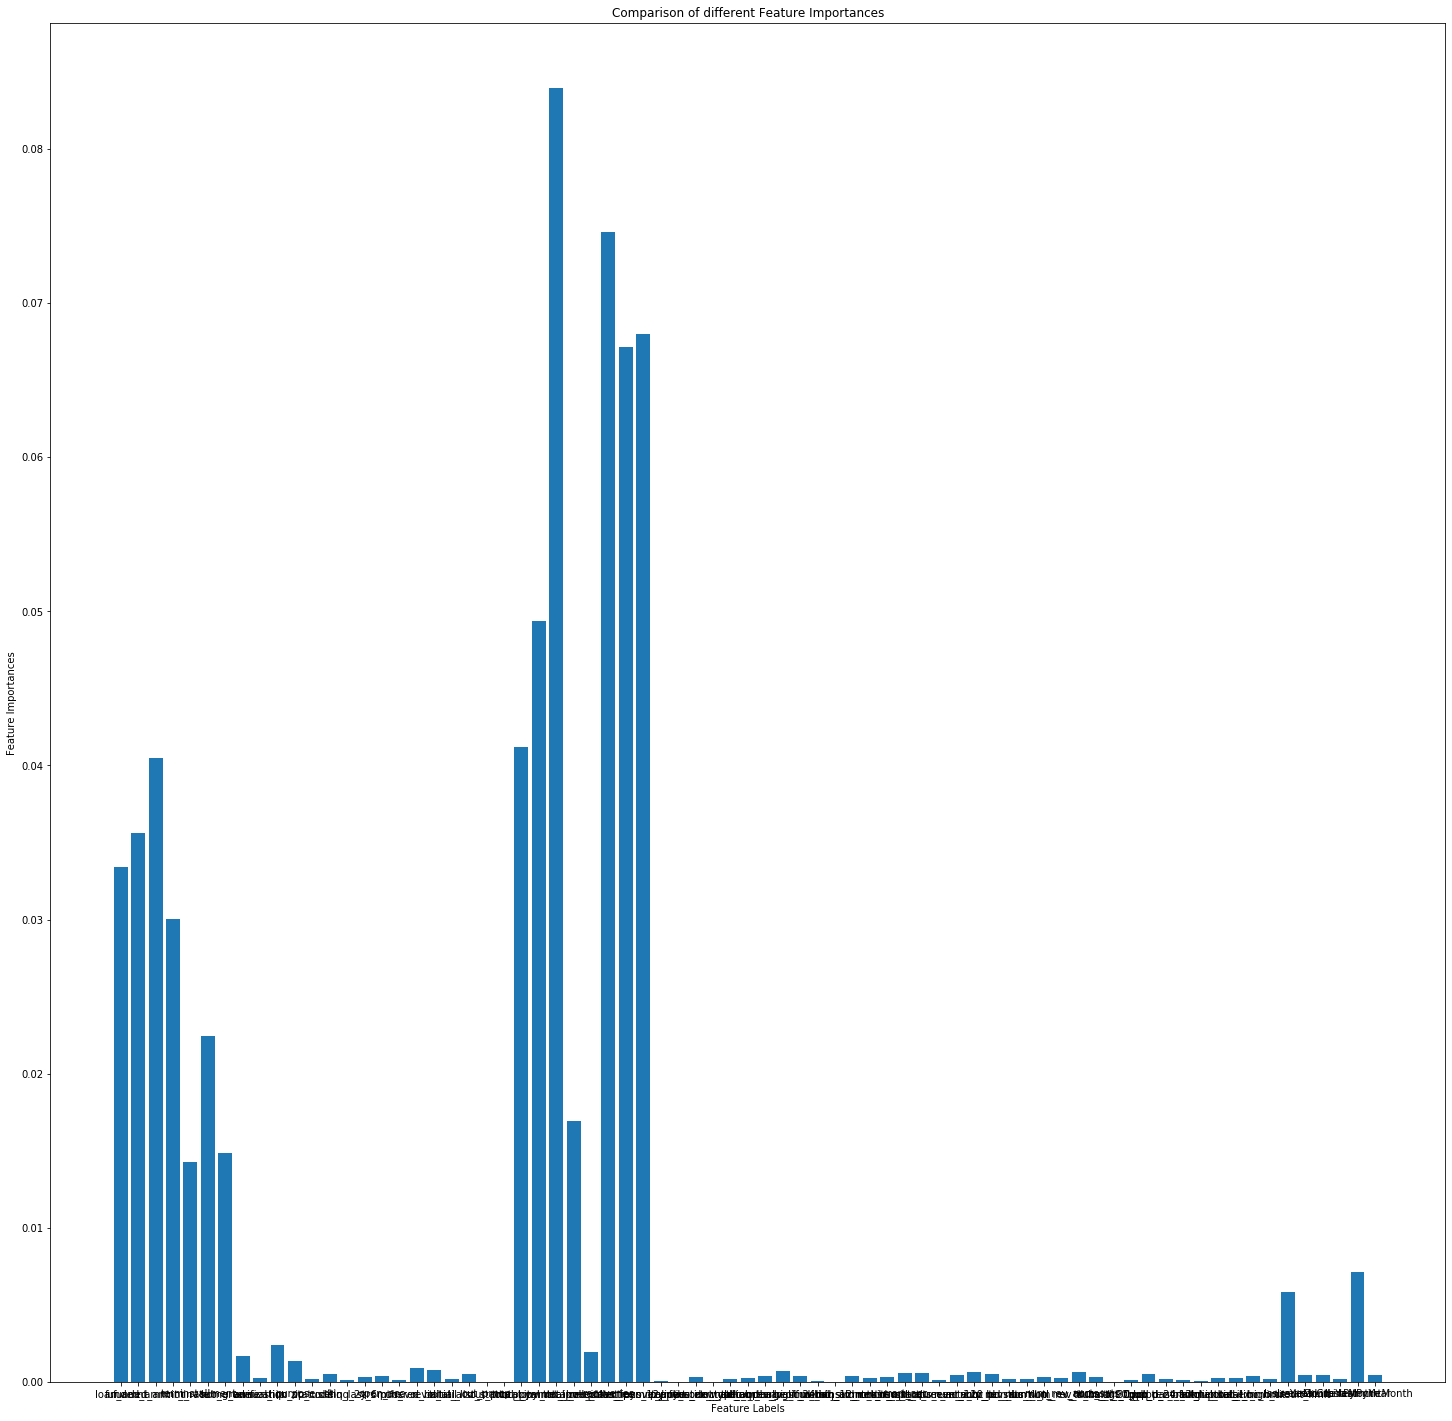

In [41]:
# Plotting a Bar Graph to compare the models 
plt.figure(figsize=(25,25))
plt.bar(X.columns, feature_importance_normalized) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show() 

In [42]:
feature_importance

array([5.75631401e-02, 5.88334159e-02, 5.86024830e-02, 3.64115131e-02,
       1.42153577e-02, 4.14126485e-02, 1.38681574e-02, 1.83605907e-03,
       8.28791066e-04, 3.02658054e-03, 1.64996852e-03, 7.52362440e-04,
       1.05184753e-03, 4.93729253e-04, 7.12471849e-04, 7.58589455e-04,
       4.94640426e-04, 8.94838315e-04, 1.20821071e-03, 7.05273879e-04,
       9.12887224e-04, 1.28949321e-05, 1.37640531e-05, 8.32255847e-02,
       8.58157084e-02, 1.92929853e-01, 2.04569023e-02, 4.43481997e-03,
       8.27609332e-02, 8.58979031e-02, 1.07499785e-01, 1.90079028e-04,
       0.00000000e+00, 3.06556563e-04, 6.00762142e-05, 5.35695765e-04,
       7.44479132e-04, 7.93317394e-04, 1.04796423e-03, 8.53962573e-04,
       1.09542941e-04, 6.10511372e-05, 8.55005930e-04, 7.32561315e-04,
       7.47694476e-04, 7.96015944e-04, 9.47228666e-04, 5.25137370e-04,
       9.17247564e-04, 1.12388558e-03, 8.17655083e-04, 7.18892770e-04,
       7.24911162e-04, 8.05049825e-04, 7.03984717e-04, 1.14144182e-03,
      

In [43]:
print(feature_importance)

[5.75631401e-02 5.88334159e-02 5.86024830e-02 3.64115131e-02
 1.42153577e-02 4.14126485e-02 1.38681574e-02 1.83605907e-03
 8.28791066e-04 3.02658054e-03 1.64996852e-03 7.52362440e-04
 1.05184753e-03 4.93729253e-04 7.12471849e-04 7.58589455e-04
 4.94640426e-04 8.94838315e-04 1.20821071e-03 7.05273879e-04
 9.12887224e-04 1.28949321e-05 1.37640531e-05 8.32255847e-02
 8.58157084e-02 1.92929853e-01 2.04569023e-02 4.43481997e-03
 8.27609332e-02 8.58979031e-02 1.07499785e-01 1.90079028e-04
 0.00000000e+00 3.06556563e-04 6.00762142e-05 5.35695765e-04
 7.44479132e-04 7.93317394e-04 1.04796423e-03 8.53962573e-04
 1.09542941e-04 6.10511372e-05 8.55005930e-04 7.32561315e-04
 7.47694476e-04 7.96015944e-04 9.47228666e-04 5.25137370e-04
 9.17247564e-04 1.12388558e-03 8.17655083e-04 7.18892770e-04
 7.24911162e-04 8.05049825e-04 7.03984717e-04 1.14144182e-03
 7.43786295e-04 4.51910418e-05 2.94601984e-04 9.10800376e-04
 6.69742090e-04 4.53282501e-04 2.52792031e-04 7.18394063e-04
 7.17989186e-04 8.601314

In [44]:
print(extra_tree_forest.feature_importances_)

[5.75631401e-02 5.88334159e-02 5.86024830e-02 3.64115131e-02
 1.42153577e-02 4.14126485e-02 1.38681574e-02 1.83605907e-03
 8.28791066e-04 3.02658054e-03 1.64996852e-03 7.52362440e-04
 1.05184753e-03 4.93729253e-04 7.12471849e-04 7.58589455e-04
 4.94640426e-04 8.94838315e-04 1.20821071e-03 7.05273879e-04
 9.12887224e-04 1.28949321e-05 1.37640531e-05 8.32255847e-02
 8.58157084e-02 1.92929853e-01 2.04569023e-02 4.43481997e-03
 8.27609332e-02 8.58979031e-02 1.07499785e-01 1.90079028e-04
 0.00000000e+00 3.06556563e-04 6.00762142e-05 5.35695765e-04
 7.44479132e-04 7.93317394e-04 1.04796423e-03 8.53962573e-04
 1.09542941e-04 6.10511372e-05 8.55005930e-04 7.32561315e-04
 7.47694476e-04 7.96015944e-04 9.47228666e-04 5.25137370e-04
 9.17247564e-04 1.12388558e-03 8.17655083e-04 7.18892770e-04
 7.24911162e-04 8.05049825e-04 7.03984717e-04 1.14144182e-03
 7.43786295e-04 4.51910418e-05 2.94601984e-04 9.10800376e-04
 6.69742090e-04 4.53282501e-04 2.52792031e-04 7.18394063e-04
 7.17989186e-04 8.601314

In [45]:
idx = np.arange(0, X.shape[1])

In [46]:
idx

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [47]:
features_to_keep = idx[feature_importance > np.mean(feature_importance)]

In [48]:
features_to_keep

array([ 0,  1,  2,  3,  4,  5,  6, 23, 24, 25, 26, 28, 29, 30])

In [49]:
len(features_to_keep)

14

In [50]:
x_feature_selected = X.iloc[:, features_to_keep]

In [51]:
x_feature_selected.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'sub_grade', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt'],
      dtype='object')

In [52]:
x_feature_selected.shape

(1113558, 14)

In [28]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,subGrade_1,subGrade_2,subGrade_3,subGrade_4,subGrade_5,subGrade_6,subGrade_7,subGrade_8,subGrade_9,subGrade_10,subGrade_11,subGrade_12,subGrade_13,subGrade_14,subGrade_15,subGrade_16,subGrade_17,subGrade_18,subGrade_19,subGrade_20,subGrade_21,subGrade_22,subGrade_23,subGrade_24,subGrade_25,subGrade_26,subGrade_27,subGrade_28,subGrade_29,subGrade_30,subGrade_31,subGrade_32,subGrade_33,subGrade_34,home_ownership_1,home_ownership_2,verification_status_1,verification_status_2,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13
0,30000,30000,30000.000000,0,22.350000,1151.160000,100000.000000,30.460000,0.000000,0.000000,11.000000,1.000000,15603,37.000000,19.000000,1,0.000000,0.000000,30026.442500,30026.440000,30000.000000,26.440000,0.000000,0.000000,0.000000,30082.320000,0.000000,1,0.000000,0.000000,472330.000000,42200.000000,4.000000,42939.000000,0.000000,0.000000,73.000000,23.000000,2.000000,1.000000,8.000000,0.000000,3.000000,4.000000,3.000000,5.000000,10.000000,6.000000,8.000000,4.000000,11.000000,0.000000,0.000000,2.000000,89.500000,1.000000,0.000000,527120.000000,98453.000000,28600.000000,101984.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,40000,40000,40000.000000,1,16.140000,975.710000,45000.000000,50.530000,0.000000,0.000000,18.000000,0.000000,34971,64.500000,37.000000,1,0.000000,0.000000,40856.678960,40856.680000,40000.000000,856.680000,0.000000,0.000000,0.000000,40910.480000,0.000000,1,0.000000,0.000000,271068.000000,54200.000000,5.000000,15059.000000,0.000000,0.000000,70.000000,2.000000,2.000000,1.000000,9.000000,0.000000,7.000000,9.000000,7.000000,7.000000,26.000000,9.000000,10.000000,9.000000,18.000000,0.000000,0.000000,4.000000,100.000000,0.000000,0.000000,344802.000000,161720.000000,45700.000000,167965.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,20000,20000.000000,0,7.560000,622.680000,100000.000000,18.920000,0.000000,0.000000,9.000000,0.000000,25416,29.900000,19.000000,1,0.000000,0.000000,20215.792430,20215.790000,20000.000000,215.790000,0.000000,0.000000,0.000000,20228.390000,0.000000,1,0.000000,0.000000,515779.000000,85100.000000,5.000000,57309.000000,0.000000,0.000000,238.000000,1.000000,1.000000,5.000000,13.000000,0.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,9.000000,5.000000,9.000000,0.000000,0.000000,1.000000,94.700000,0.000000,0.000000,622183.000000,71569.000000,85100.000000,74833.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4500,4500,4500.000000,0,11.310000,147.990000,38500.000000,4.640000,0.000000,0.000000,12.000000,0.000000,4472,15.300000,25.000000,1,0.000000,0.000000,4549.217149,4549.220000,4500.000000,49.220000,0.000000,0.000000,0.000000,4553.460000,0.000000,0,0.000000,306.000000,29137.000000,29200.000000,8.000000,2428.000000,0.000000,0.000000,69.000000,2.000000,2.000000,0.000000,6.000000,1.000000,3.000000,5.000000,5.0000

In [29]:
X = X.iloc[:, features_to_keep]

NameError: name 'features_to_keep' is not defined

In [30]:
X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,subGrade_1,subGrade_2,subGrade_3,subGrade_4,subGrade_5,subGrade_6,subGrade_7,subGrade_8,subGrade_9,subGrade_10,subGrade_11,subGrade_12,subGrade_13,subGrade_14,subGrade_15,subGrade_16,subGrade_17,subGrade_18,subGrade_19,subGrade_20,subGrade_21,subGrade_22,subGrade_23,subGrade_24,subGrade_25,subGrade_26,subGrade_27,subGrade_28,subGrade_29,subGrade_30,subGrade_31,subGrade_32,subGrade_33,subGrade_34,home_ownership_1,home_ownership_2,verification_status_1,verification_status_2,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13
0,30000,30000,30000.000000,0,22.350000,1151.160000,100000.000000,30.460000,0.000000,0.000000,11.000000,1.000000,15603,37.000000,19.000000,1,0.000000,0.000000,30026.442500,30026.440000,30000.000000,26.440000,0.000000,0.000000,0.000000,30082.320000,0.000000,1,0.000000,0.000000,472330.000000,42200.000000,4.000000,42939.000000,0.000000,0.000000,73.000000,23.000000,2.000000,1.000000,8.000000,0.000000,3.000000,4.000000,3.000000,5.000000,10.000000,6.000000,8.000000,4.000000,11.000000,0.000000,0.000000,2.000000,89.500000,1.000000,0.000000,527120.000000,98453.000000,28600.000000,101984.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,40000,40000,40000.000000,1,16.140000,975.710000,45000.000000,50.530000,0.000000,0.000000,18.000000,0.000000,34971,64.500000,37.000000,1,0.000000,0.000000,40856.678960,40856.680000,40000.000000,856.680000,0.000000,0.000000,0.000000,40910.480000,0.000000,1,0.000000,0.000000,271068.000000,54200.000000,5.000000,15059.000000,0.000000,0.000000,70.000000,2.000000,2.000000,1.000000,9.000000,0.000000,7.000000,9.000000,7.000000,7.000000,26.000000,9.000000,10.000000,9.000000,18.000000,0.000000,0.000000,4.000000,100.000000,0.000000,0.000000,344802.000000,161720.000000,45700.000000,167965.000000,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,20000,20000,20000.000000,0,7.560000,622.680000,100000.000000,18.920000,0.000000,0.000000,9.000000,0.000000,25416,29.900000,19.000000,1,0.000000,0.000000,20215.792430,20215.790000,20000.000000,215.790000,0.000000,0.000000,0.000000,20228.390000,0.000000,1,0.000000,0.000000,515779.000000,85100.000000,5.000000,57309.000000,0.000000,0.000000,238.000000,1.000000,1.000000,5.000000,13.000000,0.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,9.000000,5.000000,9.000000,0.000000,0.000000,1.000000,94.700000,0.000000,0.000000,622183.000000,71569.000000,85100.000000,74833.000000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4500,4500,4500.000000,0,11.310000,147.990000,38500.000000,4.640000,0.000000,0.000000,12.000000,0.000000,4472,15.300000,25.000000,1,0.000000,0.000000,4549.217149,4549.220000,4500.000000,49.220000,0.000000,0.000000,0.000000,4553.460000,0.000000,0,0.000000,306.000000,29137.000000,29200.000000,8.000000,2428.000000,0.000000,0.000000,69.000000,2.000000,2.000000,0.000000,6.000000,1.000000,3.000000,5.000000,5.0000

In [57]:
X.shape

(1113558, 14)

In [58]:
dummies = pd.get_dummies(X.sub_grade, prefix='subGrade', drop_first=True)

In [59]:
dummies.head()

,subGrade_1,subGrade_2,subGrade_3,subGrade_4,subGrade_5,subGrade_6,subGrade_7,subGrade_8,subGrade_9,subGrade_10,subGrade_11,subGrade_12,subGrade_13,subGrade_14,subGrade_15,subGrade_16,subGrade_17,subGrade_18,subGrade_19,subGrade_20,subGrade_21,subGrade_22,subGrade_23,subGrade_24,subGrade_25,subGrade_26,subGrade_27,subGrade_28,subGrade_29,subGrade_30,subGrade_31,subGrade_32,subGrade_33,subGrade_34
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [60]:
X = pd.concat([X, dummies], axis = 1)

In [61]:
X.drop('sub_grade', axis = 1, inplace = True)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [63]:
X['term'] = le.fit_transform(X['term'])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [23]:
X_train.shape

(890846, 112)

In [24]:
y_train.value_counts()

1    705947
0    184899
Name: loan_status, dtype: int64

In [226]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [73]:
model = RandomForestClassifier()

In [74]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 15, cv = 3, verbose=15, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed: 43.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 43.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed: 44.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 44.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 71.8min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed: 72.0min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed: 72.1min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed: 72.6min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 74.8min
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed: 7

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [248]:
model = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf=4,max_features= 'sqrt', max_depth = 80, class_weight='balanced', bootstrap=False)

In [84]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': False}

In [249]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [250]:
rf_predictions = model.predict(X_test)

In [ ]:
rf_probs = model.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import roc_auc_score


In [ ]:
roc_value = roc_auc_score(y_test, rf_probs)

In [ ]:
roc_value

In [251]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [252]:
results = confusion_matrix(y_test, rf_predictions) 

In [253]:
results

array([[ 45754,    461],
       [     0, 176497]], dtype=int64)

In [254]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     46215
           1       1.00      1.00      1.00    176497

    accuracy                           1.00    222712
   macro avg       1.00      1.00      1.00    222712
weighted avg       1.00      1.00      1.00    222712



In [ ]:
sns.heatmap(results, annot=True)

In [ ]:
df.loan_status.value_counts()

In [54]:
X_train_balanced

array([[0.18974359, 0.18974359, 0.19490446, ..., 0.        , 0.        ,
        0.        ],
       [0.82051282, 0.82051282, 0.82165605, ..., 0.        , 0.        ,
        0.        ],
       [0.34358974, 0.34358974, 0.3477707 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.32364103, 0.32364103, 0.32796478, ..., 0.        , 0.        ,
        0.        ],
       [0.38230769, 0.38230769, 0.38624614, ..., 0.        , 0.        ,
        0.        ],
       [0.07948718, 0.07948718, 0.0853655 , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
X.shape

(1113558, 112)

In [ ]:
len(y)

## Balancing

In [26]:
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [27]:
oversample = SMOTE(n_jobs=-1)
X_train_balanced, y_train_balanced = oversample.fit_resample(X_train, y_train)

In [29]:
y_train_balanced.value_counts()

1    705947
0    705947
Name: loan_status, dtype: int64

In [30]:
X_train_balanced.shape

(1411894, 112)

In [34]:
X_train_balanced.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,subGrade_1,subGrade_2,subGrade_3,subGrade_4,subGrade_5,subGrade_6,subGrade_7,subGrade_8,subGrade_9,subGrade_10,subGrade_11,subGrade_12,subGrade_13,subGrade_14,subGrade_15,subGrade_16,subGrade_17,subGrade_18,subGrade_19,subGrade_20,subGrade_21,subGrade_22,subGrade_23,subGrade_24,subGrade_25,subGrade_26,subGrade_27,subGrade_28,subGrade_29,subGrade_30,subGrade_31,subGrade_32,subGrade_33,subGrade_34,home_ownership_1,home_ownership_2,verification_status_1,verification_status_2,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,purpose_11,purpose_12,purpose_13
0,8400,8400,8400.000000,0,19.520000,310.130000,21000.000000,26.630000,1.000000,1.000000,18.000000,0.000000,12907,77.000000,25.000000,0,0.000000,0.000000,11149.372680,11149.370000,8400.000000,2749.370000,0.000000,0.000000,0.000000,1225.210000,0.000000,0,0.000000,0.000000,17750.000000,16400.000000,5.000000,1109.000000,0.000000,0.000000,249.000000,5.000000,5.000000,0.000000,0.000000,0.000000,7.000000,10.000000,7.000000,10.000000,3.000000,16.000000,22.000000,10.000000,18.000000,0.000000,0.000000,1.000000,100.000000,0.000000,0.000000,27200.000000,17750.000000,11600.000000,10800.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,33000,33000,33000.000000,0,8.240000,1037.760000,130000.000000,17.830000,3.000000,0.000000,15.000000,1.000000,10383,46.600000,24.000000,1,0.000000,0.000000,35771.607739,35771.610000,33000.000000,2771.610000,0.000000,0.000000,0.000000,22295.840000,0.000000,0,0.000000,0.000000,285586.000000,22300.000000,4.000000,19039.000000,0.000000,0.000000,238.000000,6.000000,6.000000,1.000000,20.000000,0.000000,1.000000,5.000000,2.000000,2.000000,11.000000,7.000000,12.000000,5.000000,15.000000,0.000000,0.000000,1.000000,87.500000,1.000000,0.000000,315191.000000,116351.000000,8500.000000,119589.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,14400,14400,14400.000000,1,21.180000,391.030000,60000.000000,25.060000,0.000000,0.000000,11.000000,0.000000,9711,47.800000,14.000000,1,0.000000,0.000000,19387.270000,19387.270000,14400.000000,4987.270000,0.000000,0.000000,0.000000,11175.640000,0.000000,0,0.000000,206.000000,183055.000000,20300.000000,9.000000,16641.000000,0.000000,0.000000,78.000000,9.000000,6.000000,1.000000,9.000000,0.000000,5.000000,8.000000,5.000000,5.000000,5.000000,8.000000,8.000000,8.000000,11.000000,0.000000,0.000000,4.000000,85.700000,0.000000,0.000000,210796.000000,31265.000000,5900.000000,33354.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,24000,24000,24000.000000,0,5.320000,722.760000,72000.000000,18.270000,0.000000,0.000000,9.000000,0.000000,19646,47.500000,19.000000,1,0.000000,0.000000,25990.012458,25990.010000,24000.000000,1990.010000,0.000000,0.000000,0.000000,2875.880000,0.000000,0,0.000000,0.000000,45833.000000,41400.000000,3.000000,5093.000000,0.000000,0.000000,127.000000,22.000000,5.000000,0.000000,10.000000,0.000000,2.000000,2.00000

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [55]:
X_train = scaler.transform(X_train)

In [ ]:
X_test

# Random Forest Classifier

## Random Forest on balanced dataset

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model_rf = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf=4,max_features= 'sqrt', max_depth = 80, class_weight='balanced', bootstrap=False)

In [41]:
model_rf.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
predictions = model_rf.predict(X_test)

In [43]:
probs = model_rf.predict_proba(X_test)[:, 1]

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

In [46]:
roc_value = roc_auc_score(y_test, probs)

In [47]:
roc_value

0.9999057998031265

In [48]:
results = confusion_matrix(y_test, predictions) 

In [49]:
results

array([[ 45597,    618],
       [     0, 176497]], dtype=int64)

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     46215
           1       1.00      1.00      1.00    176497

    accuracy                           1.00    222712
   macro avg       1.00      0.99      1.00    222712
weighted avg       1.00      1.00      1.00    222712



In [51]:
print(accuracy_score(y_test, predictions))

0.9972251158446783


## Random Forest on imbalanced dataset

In [56]:
model = RandomForestClassifier(n_estimators= 100, min_samples_split= 10, min_samples_leaf=4,max_features= 'sqrt', max_depth = 80, class_weight='balanced', bootstrap=False)

In [57]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
rf_predictions = model.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [60]:
results = confusion_matrix(y_test, rf_predictions) 

In [61]:
results

array([[ 45752,    463],
       [     0, 176497]], dtype=int64)

In [62]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     46215
           1       1.00      1.00      1.00    176497

    accuracy                           1.00    222712
   macro avg       1.00      0.99      1.00    222712
weighted avg       1.00      1.00      1.00    222712



# Logistic Regression on Unbalanced dataset

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression(penalty='l2')
logmodel.fit(X_train, y_train)

C:\Users\Shreyas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
log_predictions = logmodel.predict(X_test)

In [66]:
results = confusion_matrix(y_test, log_predictions) 

In [67]:
results

array([[ 45138,   1077],
       [     1, 176496]], dtype=int64)

In [68]:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     46215
           1       0.99      1.00      1.00    176497

    accuracy                           1.00    222712
   macro avg       1.00      0.99      0.99    222712
weighted avg       1.00      1.00      1.00    222712



# ANN

In [240]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [241]:
model = Sequential()

In [242]:
X_train.shape

(890846, 112)

In [243]:
model.add(Dense(112,  activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(65, activation='relu'))
model.add(Dropout(0.3))

# hidden layer
model.add(Dense(25, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [244]:
model.fit(x=X_train, 
          y=y_train.values, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test.values), 
          )

Train on 890846 samples, validate on 222712 samples
Epoch 1/25
890846/890846 [==============================] - 19s 21us/sample - loss: 0.0445 - val_loss: 0.0137
Epoch 2/25
890846/890846 [==============================] - 15s 17us/sample - loss: 0.0128 - val_loss: 0.0090
Epoch 3/25
890846/890846 [==============================] - 15s 16us/sample - loss: 0.0106 - val_loss: 0.0057
Epoch 4/25
890846/890846 [==============================] - 15s 16us/sample - loss: 0.0095 - val_loss: 0.0054
Epoch 5/25
890846/890846 [==============================] - 15s 17us/sample - loss: 0.0084 - val_loss: 0.0058
Epoch 6/25
890846/890846 [==============================] - 15s 17us/sample - loss: 0.0082 - val_loss: 0.0044
Epoch 7/25
890846/890846 [==============================] - 15s 17us/sample - loss: 0.0077 - val_loss: 0.0040
Epoch 8/25
890846/890846 [==============================] - 17s 19us/sample - loss: 0.0072 - val_loss: 0.0037
Epoch 9/25
890846/890846 [==============================] - 16s 18us

In [245]:
losses = pd.DataFrame(model.history.history)

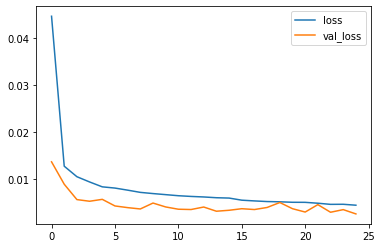

In [246]:
losses[['loss','val_loss']].plot()

In [247]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     46215
           1       1.00      1.00      1.00    176497

    accuracy                           1.00    222712
   macro avg       1.00      1.00      1.00    222712
weighted avg       1.00      1.00      1.00    222712



In [124]:
confusion_matrix(y_test,predictions)

array([[ 46101,    114],
       [     1, 176496]], dtype=int64)